In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np
import cv2
import os

In [ ]:
X = []
y = []
#0-eyes open
#1-eyes close
#2-no yawn
#3-yawn
for img_name in os.listdir("./gdrive/MyDrive/A_A_N/Closed"):
    img = cv2.imread(f"./gdrive/MyDrive/A_A_N/Closed/{img_name}")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (100, 100))
    img = np.array(img)
    img = img.astype("float32")
    img /= 255
    X.append(img)
    y.append(1)

for img_name in os.listdir("./gdrive/MyDrive/A_A_N/Open"):
    img = cv2.imread(f"./gdrive/MyDrive/A_A_N/Open/{img_name}")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (100, 100))
    img = np.array(img)
    img = img.astype("float32")
    img /= 255
    X.append(img)
    y.append(0)
for img_name in os.listdir("./gdrive/MyDrive/A_A_N/yawn"):
    img = cv2.imread(f"./gdrive/MyDrive/A_A_N/yawn/{img_name}")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (100, 100))
    img = np.array(img)
    img = img.astype("float32")
    img /= 255
    X.append(img)
    y.append(3)

for img_name in os.listdir("./gdrive/MyDrive/A_A_N/no_yawn"):
    img = cv2.imread(f"./gdrive/MyDrive/A_A_N/no_yawn/{img_name}")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (100, 100))
    img = np.array(img)
    img = img.astype("float32")
    img /= 255
    X.append(img)
    y.append(2)

In [ ]:
X = np.array(X)
y = np.array(y)
X = X.reshape((-1, 100, 100, 1))

In [ ]:
print(len(X), len(y))

2900 2900


In [ ]:
print(X.shape, y.shape)

(2900, 100, 100, 1) (2900,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(2320, 100, 100, 1) (2320,) (580, 100, 100, 1) (580,)


In [ ]:
nsamples, nx, ny, nrgb = X_train.shape
x_train2 = X_train.reshape((nsamples,nx*ny*nrgb))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train2,y_train)

RandomForestClassifier()

In [ ]:
nsamples, nx, ny, nrgb = X_test.shape
x_test2 = X_test.reshape((nsamples,nx*ny*nrgb))

In [ ]:
y_pred=model.predict(x_test2)
y_pred

array([2, 0, 3, 0, 0, 2, 2, 1, 3, 0, 2, 1, 0, 3, 1, 1, 3, 2, 0, 0, 2, 0,
       3, 2, 0, 2, 3, 2, 3, 0, 2, 2, 1, 1, 0, 1, 1, 1, 1, 2, 3, 1, 3, 1,
       1, 2, 2, 0, 3, 0, 1, 1, 1, 2, 0, 3, 2, 3, 3, 2, 0, 2, 1, 0, 1, 1,
       2, 2, 2, 0, 1, 2, 1, 0, 2, 1, 0, 3, 0, 2, 1, 3, 1, 0, 2, 1, 1, 0,
       1, 0, 0, 3, 1, 0, 3, 0, 1, 2, 1, 1, 2, 3, 2, 3, 0, 0, 1, 2, 1, 2,
       2, 1, 0, 3, 1, 3, 0, 3, 0, 0, 2, 1, 0, 0, 2, 2, 1, 3, 2, 0, 3, 0,
       1, 0, 1, 1, 3, 1, 0, 2, 0, 1, 2, 0, 3, 3, 3, 2, 2, 1, 3, 2, 2, 3,
       3, 0, 3, 1, 1, 2, 1, 0, 3, 2, 0, 1, 3, 3, 0, 3, 2, 0, 3, 2, 3, 2,
       2, 1, 3, 1, 3, 3, 2, 0, 3, 1, 3, 0, 3, 0, 2, 0, 0, 2, 2, 0, 0, 1,
       0, 1, 2, 0, 1, 0, 2, 2, 2, 0, 2, 0, 3, 3, 3, 2, 3, 3, 3, 0, 2, 1,
       2, 2, 2, 2, 0, 2, 0, 2, 3, 2, 1, 2, 2, 2, 0, 3, 1, 1, 2, 2, 0, 3,
       0, 3, 0, 0, 2, 0, 1, 1, 0, 2, 3, 0, 3, 3, 3, 0, 2, 1, 0, 3, 0, 1,
       1, 3, 2, 0, 1, 1, 3, 1, 1, 0, 3, 3, 0, 2, 1, 0, 0, 0, 1, 2, 1, 1,
       2, 3, 0, 2, 0, 1, 2, 1, 0, 0, 2, 2, 3, 2, 2,

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy = accuracy_score(y_pred,y_test)

print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92       157
           1       0.90      0.93      0.91       136
           2       0.99      0.94      0.96       155
           3       0.94      0.98      0.96       132

    accuracy                           0.94       580
   macro avg       0.94      0.94      0.94       580
weighted avg       0.94      0.94      0.94       580



In [ ]:

from sklearn.metrics import accuracy_score, log_loss

# assuming model is already trained and X_test and y_test are defined

# y_pred = model.predict(X_test) # predict labels for X_test
y_pred_prob = model.predict_proba(x_test2) # predict probabilities for X_test
y_pred = model.predict(x_test2) # predict labels for X_test
accuracy = accuracy_score(y_pred,y_test) # compute accuracy
loss = log_loss(y_test, y_pred_prob)
# loss = log_loss(y_pred,y_test) # compute loss

acc_history = [accuracy] # create a list to store accuracy for each epoch
loss_history = [loss] # create a list to store loss for each epoch


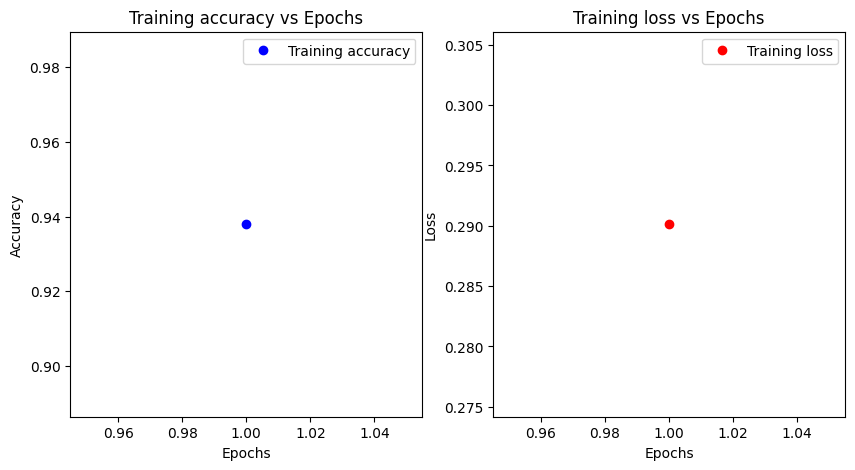

In [ ]:
import matplotlib.pyplot as plt

# assuming acc_history and loss_history are lists of accuracy and loss values for each epoch

# create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

# plot accuracy vs epochs in the first subplot
epochs = range(1, len(acc_history) + 1)
ax1.plot(epochs, acc_history, 'bo', label='Training accuracy')
ax1.set_title('Training accuracy vs Epochs')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()

# plot loss vs epochs in the second subplot
epochs = range(1, len(loss_history) + 1)
ax2.plot(epochs, loss_history, 'ro', label='Training loss')
ax2.set_title('Training loss vs Epochs')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

plt.show()


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn=KNeighborsClassifier(n_neighbors=7)

In [ ]:
knn.fit(x_train2,y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
y_pred_knn=knn.predict(x_test2)
y_pred_knn

array([2, 0, 3, 0, 1, 3, 2, 1, 3, 0, 2, 1, 1, 3, 1, 1, 3, 2, 1, 0, 2, 0,
       2, 2, 1, 2, 3, 2, 3, 0, 2, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 3, 1,
       1, 2, 3, 0, 3, 0, 1, 1, 1, 2, 1, 2, 2, 2, 3, 2, 0, 2, 1, 0, 1, 0,
       2, 2, 2, 1, 1, 2, 1, 0, 2, 1, 0, 3, 0, 2, 0, 2, 1, 1, 2, 0, 0, 0,
       1, 0, 0, 3, 1, 0, 3, 0, 1, 2, 0, 1, 2, 3, 2, 3, 0, 0, 0, 2, 1, 2,
       1, 1, 0, 3, 1, 3, 1, 1, 0, 1, 2, 1, 0, 0, 3, 2, 1, 3, 1, 0, 3, 0,
       1, 0, 1, 1, 3, 0, 0, 2, 0, 1, 2, 2, 3, 2, 3, 2, 2, 1, 3, 2, 3, 3,
       3, 1, 1, 1, 1, 2, 1, 0, 3, 2, 0, 1, 2, 3, 0, 3, 2, 1, 3, 2, 3, 2,
       2, 1, 3, 1, 3, 3, 2, 1, 3, 1, 3, 0, 2, 0, 2, 1, 0, 2, 2, 0, 0, 1,
       0, 1, 2, 0, 1, 1, 2, 2, 3, 0, 2, 1, 3, 3, 2, 2, 2, 2, 3, 0, 2, 1,
       2, 2, 2, 2, 1, 2, 0, 2, 3, 2, 1, 2, 2, 3, 0, 3, 1, 1, 2, 2, 0, 3,
       0, 3, 0, 1, 2, 0, 1, 1, 1, 2, 3, 0, 3, 3, 3, 0, 2, 1, 0, 3, 0, 1,
       1, 3, 2, 0, 1, 1, 3, 1, 1, 1, 3, 3, 0, 2, 1, 0, 0, 0, 1, 2, 1, 0,
       3, 3, 0, 2, 0, 1, 2, 1, 0, 1, 3, 2, 2, 2, 2,

In [ ]:
accuracy_score(y_pred_knn,y_test)
print(classification_report(y_pred_knn,y_test))

              precision    recall  f1-score   support

           0       0.70      0.89      0.78       121
           1       0.91      0.71      0.79       180
           2       0.84      0.75      0.80       166
           3       0.68      0.82      0.74       113

    accuracy                           0.78       580
   macro avg       0.78      0.79      0.78       580
weighted avg       0.80      0.78      0.78       580



In [ ]:

from sklearn.metrics import accuracy_score, log_loss

# assuming model is already trained and X_test and y_test are defined

# y_pred = model.predict(X_test) # predict labels for X_test
y_pred_prob =knn.predict_proba(x_test2) # predict probabilities for X_test
y_pred_knn = knn.predict(x_test2) # predict labels for X_test
accuracy_knn = accuracy_score(y_pred_knn,y_test) # compute accuracy
loss_knn = log_loss(y_test, y_pred_prob)
# loss = log_loss(y_pred,y_test) # compute loss

acc_history = [accuracy_knn] # create a list to store accuracy for each epoch
loss_history = [loss_knn] # create a list to store loss for each epoch


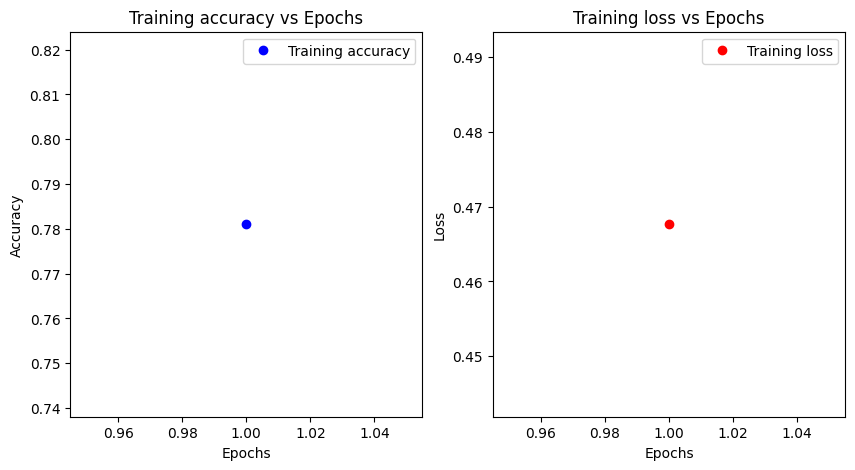

In [ ]:
import matplotlib.pyplot as plt

# assuming acc_history and loss_history are lists of accuracy and loss values for each epoch

# create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

# plot accuracy vs epochs in the first subplot
epochs = range(1, len(acc_history) + 1)
ax1.plot(epochs, acc_history, 'bo', label='Training accuracy')
ax1.set_title('Training accuracy vs Epochs')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()

# plot loss vs epochs in the second subplot
epochs = range(1, len(loss_history) + 1)
ax2.plot(epochs, loss_history, 'ro', label='Training loss')
ax2.set_title('Training loss vs Epochs')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

plt.show()


In [ ]:
from sklearn.svm import SVC # "Support vector classifier"
classifier = SVC(kernel='linear', probability=True)
classifier.fit(x_train2, y_train)

SVC(kernel='linear', probability=True)

In [ ]:
y_pred_svm= classifier.predict(x_test2)
y_pred_svm

array([2, 1, 3, 1, 0, 2, 2, 1, 3, 0, 2, 1, 0, 3, 1, 1, 3, 2, 0, 0, 2, 0,
       3, 3, 0, 2, 3, 2, 3, 0, 3, 2, 0, 1, 1, 1, 1, 1, 1, 2, 3, 1, 3, 1,
       1, 2, 2, 0, 3, 0, 1, 1, 1, 2, 0, 3, 2, 3, 3, 2, 0, 2, 1, 1, 1, 0,
       2, 2, 2, 0, 1, 2, 1, 0, 2, 1, 0, 2, 0, 2, 1, 3, 1, 0, 2, 0, 1, 0,
       1, 0, 0, 3, 1, 0, 3, 0, 1, 2, 1, 1, 2, 3, 2, 3, 0, 0, 0, 2, 1, 2,
       3, 1, 0, 3, 1, 3, 1, 3, 0, 1, 2, 1, 1, 0, 2, 2, 1, 2, 1, 0, 3, 0,
       1, 0, 1, 1, 3, 1, 0, 3, 0, 1, 2, 2, 3, 2, 3, 2, 2, 1, 3, 2, 2, 3,
       3, 1, 0, 1, 1, 2, 1, 0, 3, 2, 0, 1, 3, 3, 0, 3, 3, 0, 3, 2, 3, 2,
       3, 1, 3, 1, 3, 3, 2, 0, 3, 1, 3, 0, 3, 0, 2, 1, 0, 2, 2, 0, 0, 1,
       0, 1, 2, 0, 1, 1, 3, 2, 2, 0, 2, 0, 3, 3, 3, 2, 3, 3, 3, 0, 2, 1,
       3, 2, 3, 2, 0, 2, 1, 2, 3, 2, 0, 2, 2, 2, 0, 3, 1, 1, 2, 2, 0, 3,
       0, 3, 0, 0, 2, 0, 1, 1, 1, 2, 3, 1, 3, 3, 3, 0, 2, 1, 0, 3, 0, 1,
       1, 3, 2, 0, 1, 1, 3, 1, 1, 0, 3, 3, 0, 2, 1, 0, 0, 0, 1, 2, 1, 0,
       2, 2, 0, 2, 0, 1, 2, 1, 0, 0, 2, 2, 3, 2, 2,

In [ ]:
accuracy_score(y_pred_svm,y_test)
print(classification_report(y_pred_svm,y_test))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89       139
           1       0.94      0.85      0.89       155
           2       0.94      0.95      0.94       147
           3       0.95      0.94      0.94       139

    accuracy                           0.92       580
   macro avg       0.92      0.92      0.92       580
weighted avg       0.92      0.92      0.92       580



In [ ]:

from sklearn.metrics import accuracy_score, log_loss


y_pred_prob =classifier.predict_proba(x_test2) # predict probabilities for X_test
y_pred_svm = classifier.predict(x_test2) # predict labels for X_test
accuracy_svm = accuracy_score(y_pred_svm,y_test) # compute accuracy
loss_svm = log_loss(y_test, y_pred_prob)
# loss = log_loss(y_pred,y_test) # compute loss

acc_history = [accuracy_svm] # create a list to store accuracy for each epoch
loss_history = [loss_svm] # create a list to store loss for each epoch


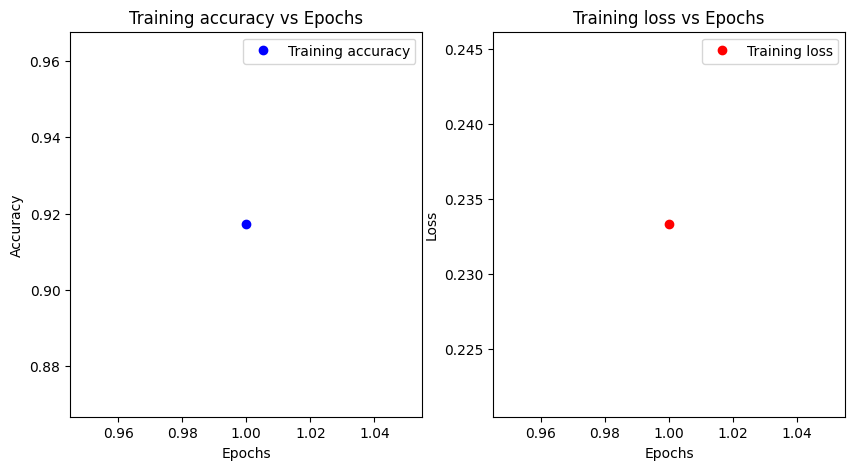

In [ ]:
import matplotlib.pyplot as plt

# assuming acc_history and loss_history are lists of accuracy and loss values for each epoch

# create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

# plot accuracy vs epochs in the first subplot
epochs = range(1, len(acc_history) + 1)
ax1.plot(epochs, acc_history, 'bo', label='Training accuracy')
ax1.set_title('Training accuracy vs Epochs')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()

# plot loss vs epochs in the second subplot
epochs = range(1, len(loss_history) + 1)
ax2.plot(epochs, loss_history, 'ro', label='Training loss')
ax2.set_title('Training loss vs Epochs')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

plt.show()


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier(criterion='entropy', random_state=0)
dt.fit(x_train2, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred_dt= dt.predict(x_test2)
y_pred_dt

array([2, 0, 3, 0, 0, 2, 2, 1, 3, 0, 2, 0, 0, 0, 1, 1, 3, 3, 1, 0, 2, 0,
       2, 2, 0, 2, 3, 3, 3, 0, 3, 2, 1, 1, 0, 1, 0, 1, 1, 2, 3, 1, 2, 1,
       1, 2, 2, 0, 3, 0, 1, 1, 1, 2, 0, 3, 2, 3, 3, 2, 0, 2, 1, 0, 1, 1,
       2, 2, 2, 0, 0, 2, 1, 0, 2, 1, 0, 3, 0, 2, 0, 3, 1, 0, 2, 0, 1, 0,
       1, 0, 0, 3, 1, 1, 3, 0, 1, 2, 1, 1, 2, 3, 2, 3, 0, 0, 1, 2, 1, 2,
       3, 1, 0, 3, 0, 3, 1, 3, 0, 1, 2, 1, 0, 1, 2, 2, 1, 2, 1, 0, 3, 0,
       0, 0, 1, 1, 3, 1, 0, 3, 0, 0, 3, 3, 3, 2, 3, 2, 2, 1, 3, 2, 2, 2,
       3, 0, 3, 1, 1, 2, 1, 0, 3, 2, 0, 1, 3, 3, 0, 3, 3, 0, 3, 2, 2, 2,
       2, 0, 3, 1, 3, 3, 2, 3, 3, 1, 3, 0, 2, 0, 2, 1, 0, 3, 2, 1, 0, 1,
       0, 0, 2, 0, 1, 1, 2, 2, 2, 0, 2, 0, 3, 3, 3, 2, 3, 3, 2, 1, 2, 1,
       2, 2, 2, 2, 1, 2, 0, 2, 3, 2, 1, 2, 3, 2, 0, 3, 1, 1, 3, 2, 0, 3,
       0, 3, 1, 0, 2, 0, 1, 1, 0, 2, 2, 1, 3, 3, 3, 0, 2, 1, 0, 3, 0, 1,
       0, 3, 2, 0, 1, 1, 3, 1, 1, 0, 3, 3, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0,
       2, 3, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 3, 2, 2,

In [ ]:
accuracy_score(y_pred_dt,y_test)
print(classification_report(y_pred_dt,y_test))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79       151
           1       0.79      0.79      0.79       141
           2       0.91      0.85      0.88       157
           3       0.85      0.89      0.87       131

    accuracy                           0.83       580
   macro avg       0.83      0.83      0.83       580
weighted avg       0.83      0.83      0.83       580



In [ ]:

from sklearn.metrics import accuracy_score, log_loss

# assuming model is already trained and X_test and y_test are defined

# y_pred = model.predict(X_test) # predict labels for X_test
y_pred_prob = dt.predict_proba(x_test2) # predict probabilities for X_test
y_pred_dt = dt.predict(x_test2) # predict labels for X_test
accuracy_dt = accuracy_score(y_pred_dt,y_test) # compute accuracy
loss_dt = log_loss(y_test, y_pred_prob)
# loss = log_loss(y_pred,y_test) # compute loss

acc_history = [accuracy_dt] # create a list to store accuracy for each epoch
loss_history = [loss_dt] # create a list to store loss for each epoch


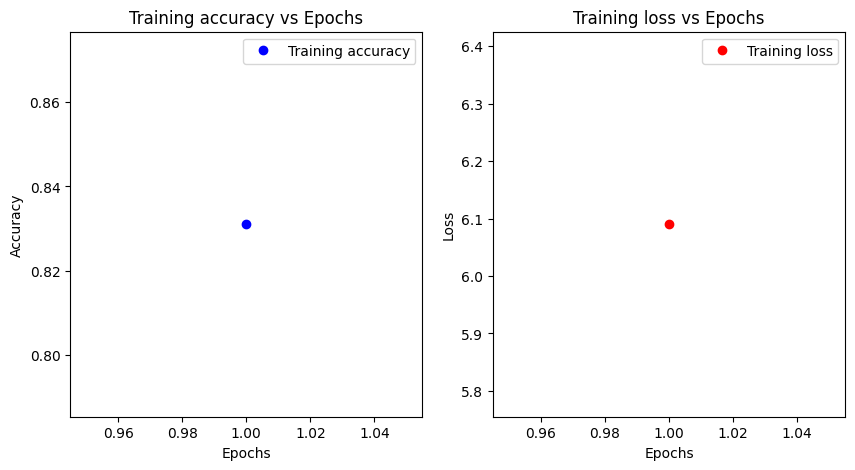

In [ ]:
import matplotlib.pyplot as plt

# assuming acc_history and loss_history are lists of accuracy and loss values for each epoch

# create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

# plot accuracy vs epochs in the first subplot
epochs = range(1, len(acc_history) + 1)
ax1.plot(epochs, acc_history, 'bo', label='Training accuracy')
ax1.set_title('Training accuracy vs Epochs')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()

# plot loss vs epochs in the second subplot
epochs = range(1, len(loss_history) + 1)
ax2.plot(epochs, loss_history, 'ro', label='Training loss')
ax2.set_title('Training loss vs Epochs')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

plt.show()


In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train2, y_train)

GaussianNB()

In [ ]:
y_pred_nb= classifier.predict(x_test2)
y_pred_nb

array([2, 0, 3, 1, 1, 2, 2, 0, 2, 0, 2, 0, 0, 3, 1, 1, 3, 2, 0, 0, 2, 0,
       2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 1, 1, 0, 1, 1, 1, 0, 2, 3, 1, 3, 1,
       1, 2, 2, 0, 3, 0, 1, 1, 1, 3, 0, 2, 2, 2, 2, 2, 3, 3, 1, 0, 1, 1,
       2, 2, 2, 0, 1, 2, 1, 1, 2, 1, 0, 3, 1, 2, 1, 2, 1, 0, 2, 0, 1, 0,
       1, 0, 0, 3, 1, 3, 3, 0, 1, 2, 1, 1, 2, 3, 2, 3, 0, 0, 0, 2, 1, 2,
       3, 1, 0, 2, 1, 2, 1, 3, 1, 1, 2, 0, 3, 0, 2, 2, 1, 2, 2, 0, 3, 0,
       1, 0, 1, 1, 3, 1, 1, 2, 0, 1, 2, 0, 3, 2, 3, 2, 2, 1, 3, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 1, 0, 3, 2, 1, 1, 3, 2, 0, 2, 2, 1, 3, 2, 3, 2,
       3, 1, 3, 0, 3, 2, 2, 3, 2, 1, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 1, 1,
       0, 1, 2, 0, 1, 0, 2, 2, 2, 0, 2, 1, 3, 3, 3, 2, 2, 2, 2, 0, 2, 1,
       2, 2, 2, 2, 0, 2, 1, 2, 3, 2, 0, 2, 2, 2, 0, 2, 1, 3, 2, 2, 1, 2,
       1, 3, 0, 0, 2, 0, 1, 1, 1, 2, 2, 3, 2, 3, 2, 0, 2, 1, 0, 2, 0, 1,
       1, 2, 2, 0, 0, 1, 3, 1, 1, 3, 3, 3, 0, 2, 1, 0, 0, 0, 0, 2, 0, 0,
       2, 3, 0, 2, 0, 3, 2, 1, 0, 0, 2, 2, 2, 2, 2,

In [ ]:
accuracy_score(y_pred_nb,y_test)
print(classification_report(y_pred_nb,y_test))

              precision    recall  f1-score   support

           0       0.72      0.83      0.77       135
           1       0.81      0.77      0.79       146
           2       0.93      0.64      0.76       214
           3       0.45      0.73      0.56        85

    accuracy                           0.73       580
   macro avg       0.73      0.74      0.72       580
weighted avg       0.78      0.73      0.74       580



In [ ]:

from sklearn.metrics import accuracy_score, log_loss


y_pred_prob =classifier.predict_proba(x_test2) # predict probabilities for X_test
y_pred_nb= classifier.predict(x_test2) # predict labels for X_test
accuracy_nb = accuracy_score(y_pred_nb,y_test) # compute accuracy
loss_nb = log_loss(y_test, y_pred_prob)
# loss = log_loss(y_pred,y_test) # compute loss

acc_history = [accuracy_nb] # create a list to store accuracy for each epoch
loss_history = [loss_nb] # create a list to store loss for each epoch


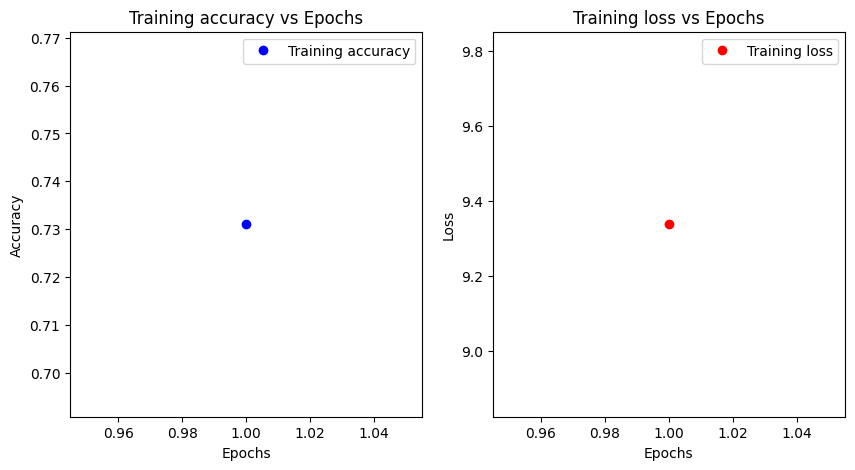

In [ ]:
import matplotlib.pyplot as plt

# assuming acc_history and loss_history are lists of accuracy and loss values for each epoch

# create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

# plot accuracy vs epochs in the first subplot
epochs = range(1, len(acc_history) + 1)
ax1.plot(epochs, acc_history, 'bo', label='Training accuracy')
ax1.set_title('Training accuracy vs Epochs')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()

# plot loss vs epochs in the second subplot
epochs = range(1, len(loss_history) + 1)
ax2.plot(epochs, loss_history, 'ro', label='Training loss')
ax2.set_title('Training loss vs Epochs')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

plt.show()
